## Problem Statement 9
### Object detection using Transfer Learning of CNN architectures for the given (image dataset 1) using the below steps: 
    a. Load in a pre-trained CNN model trained on a large dataset 
    b. Freeze parameters (weights) in model's lower convolutional layers 
    c. Add custom classifier with several layers of trainable parameters to model 
    d. Train classifier layers on training data available for task
    e. Fine-tune hyper parameters and unfreeze more layers as needed

### Import required libraries

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy
from keras.metrics import Accuracy
from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
img_generator = ImageDataGenerator(
    brightness_range=(0.5,1),
    channel_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rescale = 1./255,
    validation_split=0.3
)

In [4]:
root_dir = "caltech-101-img"

img_generator_flow_train = img_generator.flow_from_directory(
    directory = root_dir,
    target_size = (224, 224),
    batch_size = 32,
    shuffle =True,
    subset = "training")

img_generator_flow_valid = img_generator.flow_from_directory(
    directory = root_dir,
    target_size = (224, 224),
    batch_size = 32,
    shuffle = True,
    subset = "validation")

Found 6444 images belonging to 102 classes.
Found 2700 images belonging to 102 classes.


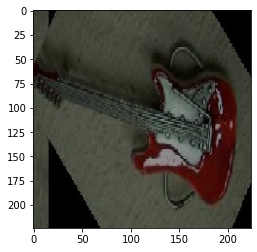

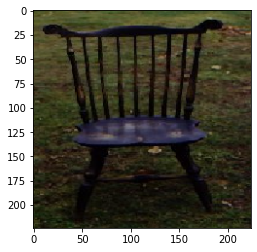

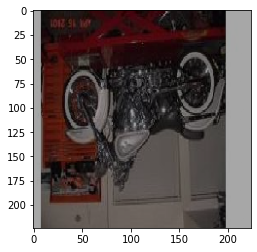

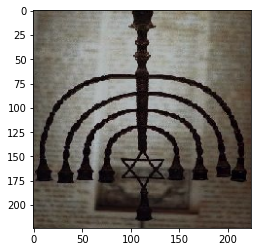

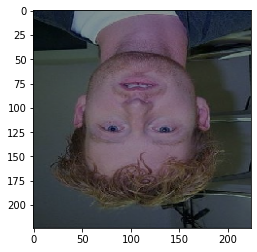

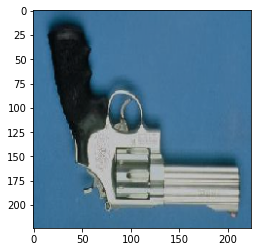

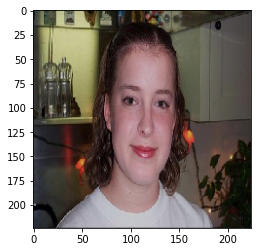

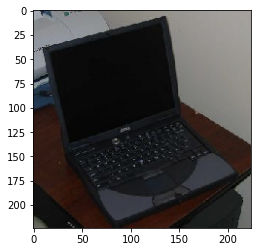

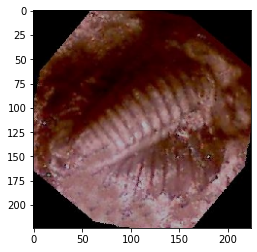

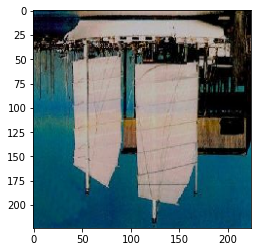

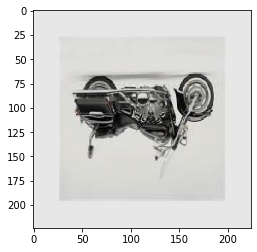

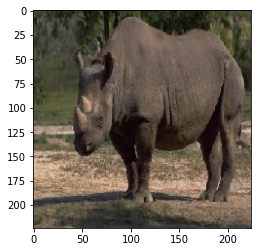

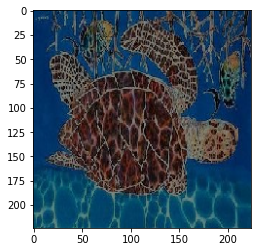

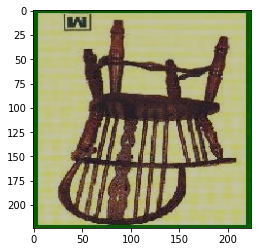

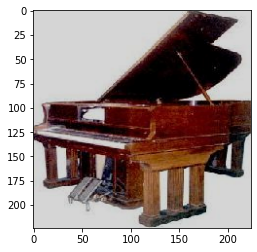

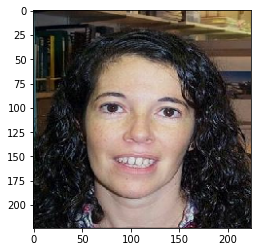

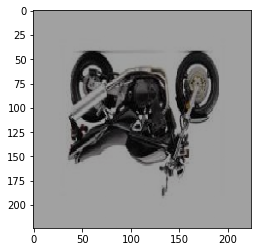

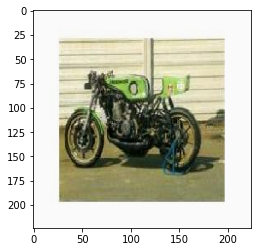

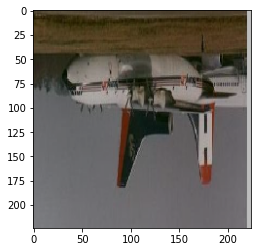

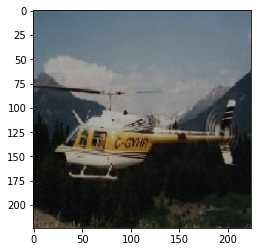

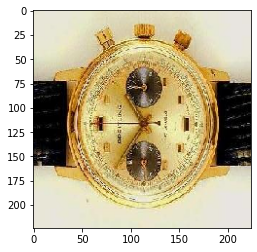

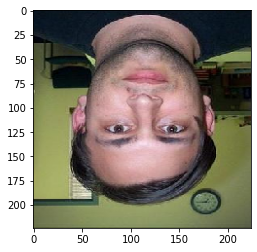

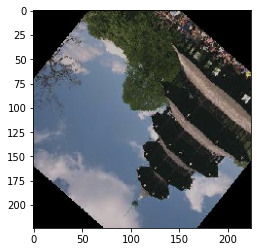

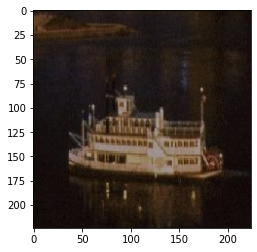

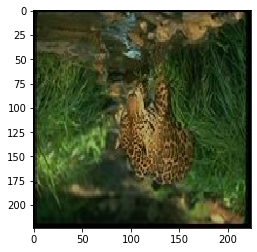

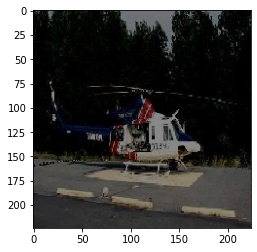

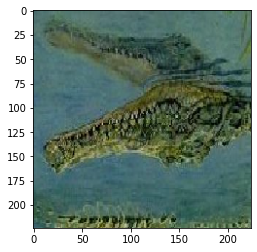

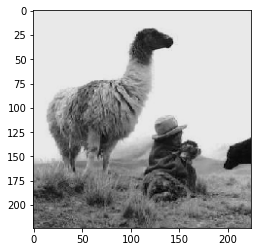

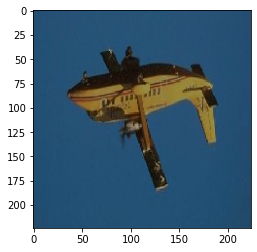

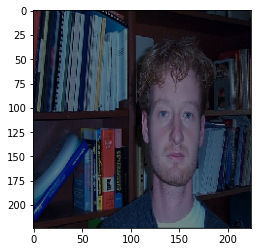

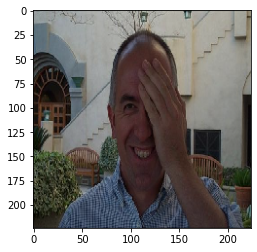

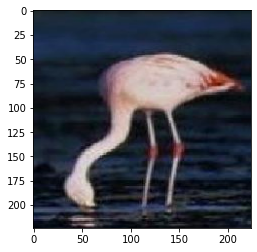

In [5]:
imgs, labels = next(iter(img_generator_flow_train))
for img, labels in zip(imgs, labels):
    plt.imshow(img)
    plt.show()

## a. Loading pre-trained model

In [11]:
model_path = "LP-IV-datasets\Object Detection(Ass6)\vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"

base_model = VGG16(input_shape=(224, 224, 3),
                   include_top = False, 
                   weights = model_path)

ValueError: The `weights` argument should be either `None` (random initialization), `imagenet` (pre-training on ImageNet), or the path to the weights file to be loaded.  Received: weights=LP-IV-datasets\Object Detection(Ass6)gg16_weights_tf_dim_ordering_tf_kernels_notop.h5

## b. Freeze parameters

In [ ]:
base_model.trainable = False

## c. Add custom classifier with several layers of trainable parameteres to model

In [ ]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(102, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 512)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 102)               470118    
                                                                 
Total params: 15184806 (57.93 MB)
Trainable params: 470118 (1.79 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


## d. Train classifier layers on training data available for task

In [ ]:
adam = Adam(0.001)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(img_generator_flow_train, 
          validation_data=img_generator_flow_valid, 
          steps_per_epoch=5,
          epochs = 10)

Epoch 1/10
5/5 [==============================] - 248s 61s/step - loss: 1.7957 - accuracy: 0.5938 - val_loss: 1.7864 - val_accuracy: 0.6093
Epoch 2/10
5/5 [==============================] - 251s 62s/step - loss: 1.4354 - accuracy: 0.6938 - val_loss: 1.7879 - val_accuracy: 0.5944
Epoch 3/10
5/5 [==============================] - 247s 61s/step - loss: 1.6127 - accuracy: 0.6313 - val_loss: 1.7103 - val_accuracy: 0.6119
Epoch 4/10
5/5 [==============================] - 249s 62s/step - loss: 1.6860 - accuracy: 0.5813 - val_loss: 1.6312 - val_accuracy: 0.6130
Epoch 5/10
5/5 [==============================] - 245s 60s/step - loss: 1.4366 - accuracy: 0.6625 - val_loss: 1.6416 - val_accuracy: 0.6089
Epoch 6/10
5/5 [==============================] - 160s 39s/step - loss: 1.2424 - accuracy: 0.6875 - val_loss: 1.6424 - val_accuracy: 0.5993
Epoch 7/10
5/5 [==============================] - 160s 40s/step - loss: 1.4593 - accuracy: 0.6875 - val_loss: 1.6018 - val_accuracy: 0.6115
Epoch 8/10
5/5 [====

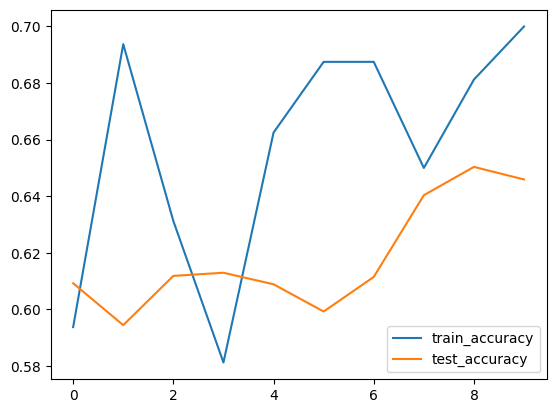

In [ ]:
plt.plot(model.history.history['accuracy'], label='train_accuracy')
plt.plot(model.history.history['val_accuracy'],label='test_accuracy')
plt.legend()

# Fine-tune hyper parameters and unfreeze more layers

In [ ]:
base_model.trainable = True

model.compile(loss='categorical_crossentropy',metrics=['categorical_accuracy'],optimizer='adam')

In [ ]:
model.fit(img_generator_flow_train, 
          validation_data=img_generator_flow_valid, 
          steps_per_epoch=5, 
          epochs=10)

Epoch 1/10
5/5 [==============================] - 284s 69s/step - loss: 4.4428 - categorical_accuracy: 0.0437 - val_loss: 4.4032 - val_categorical_accuracy: 0.0519
Epoch 2/10
5/5 [==============================] - 286s 69s/step - loss: 4.3799 - categorical_accuracy: 0.0312 - val_loss: 4.3990 - val_categorical_accuracy: 0.0519
Epoch 3/10
5/5 [==============================] - 289s 69s/step - loss: 4.3862 - categorical_accuracy: 0.0625 - val_loss: 4.3077 - val_categorical_accuracy: 0.0641
Epoch 4/10
5/5 [==============================] - 284s 68s/step - loss: 4.3912 - categorical_accuracy: 0.0929 - val_loss: 4.2633 - val_categorical_accuracy: 0.0889
Epoch 5/10
5/5 [==============================] - 292s 70s/step - loss: 4.2542 - categorical_accuracy: 0.1125 - val_loss: 4.2787 - val_categorical_accuracy: 0.0889
Epoch 6/10
5/5 [==============================] - 231s 55s/step - loss: 4.3772 - categorical_accuracy: 0.0688 - val_loss: 4.3404 - val_categorical_accuracy: 0.0889
Epoch 7/10
5/5 [